In [1]:
%env CUDA_VISIBLE_DEVICES=

env: CUDA_VISIBLE_DEVICES=


In [2]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

In [58]:
data = jnp.load("/home/meet/FlowMatchingTests/conditional-flow-matching/physics_flow_matching/multi_fidelity/analysis/inverse_problems/turb/meas_func1/mcmc_samples_parallel_noisy.npy") # jnp.load("/home/meet/FlowMatchingTests/conditional-flow-matching/physics_flow_matching/multi_fidelity/analysis/inverse_problems/turb/meas_func1/samples_grad_scale_1_itr_0.npy")
# data = [jnp.load(d) for d in ["/home/xiantao/case/wall_pressure/bigchannel/data/to_meet/channel_180_u_y5_all_out.npy",
#             "/home/xiantao/case/wall_pressure/bigchannel/data/to_meet/channel_180_v_y5_all_out_flip.npy",
#             "/home/xiantao/case/wall_pressure/bigchannel/data/to_meet/channel_180_w_y5_all_out.npy"]]

d =  jnp.load("/home/meet/FlowMatchingTests/conditional-flow-matching/physics_flow_matching/multi_fidelity/synthetic/turb/turb_128_.npy")
m = d.mean(axis=(0,2,3), keepdims=True)
std = d.std(axis=(0,2,3), keepdims=True)
data_downsampled = jnp.load("/home/meet/FlowMatchingTests/conditional-flow-matching/physics_flow_matching/multi_fidelity/synthetic/turb/turb_128_test_.npy")
# data_downsampled = [jnp.load(d) for d in ["/home/xiantao/case/wall_pressure/bigchannel/data/to_meet/channel_180_u_y5_test.npy",
#             "/home/xiantao/case/wall_pressure/bigchannel/data/to_meet/channel_180_v_y5_test.npy",
#             "/home/xiantao/case/wall_pressure/bigchannel/data/to_meet/channel_180_w_y5_test.npy"]]
# data_downsampled = data[data.shape[0]//2:]
# data = data[:data.shape[0]//2]

In [59]:
data = data*std + m

In [60]:
# jnp.save("/home/meet/FlowMatchingTests/conditional-flow-matching/physics_flow_matching/multi_fidelity/synthetic/turb/turb_128_test_.npy", data_downsampled[-5000::10])

In [61]:
# jnp.save("/home/meet/FlowMatchingTests/conditional-flow-matching/physics_flow_matching/multi_fidelity/synthetic/turb/turb_128_.npy", data)

In [62]:
# rel_rms_epch = jnp.abs(data.std(axis=(1,3,4)) - data_downsampled.std(axis=(0,2,3))[None])/data_downsampled.std(axis=(0,2,3))

In [63]:
# for i in range(3):
#     plt.plot([10, 20, 30, 40, 50, 60, 70, 80, 90, 99], rel_rms_epch[:, i]*100, label=['u', 'v', 'w'][i])
# plt.ylabel('Log rms velocity relative error')
# plt.xlabel('epoch trained (0 indexed)')
# plt.legend()
# plt.show()
    

In [64]:
# data = jnp.concat(data, axis=1)
# data_downsampled = jnp.concat(data_downsampled, axis=1)

In [65]:
# data_downsampled = jax.image.resize(data, (7000, 3, 128, 128), method='bicubic')

In [66]:
# jnp.save("/home/meet/FlowMatchingTests/conditional-flow-matching/physics_flow_matching/multi_fidelity/synthetic/turb/turb_128_y5_test", data_downsampled)

In [77]:
comp = 2

In [78]:
dz = 2*jnp.pi/128
dx = 4*jnp.pi/128
tke_ground = jax.scipy.signal.welch(data[:, comp],fs=1/dz,scaling='spectrum',axis=-1, nperseg=128)  #jax.scipy.signal.welch(data[:, comp, 64:],fs=1/dz,scaling='spectrum',axis=-1, nperseg=128) 
tke_ground_downsample = jax.scipy.signal.welch(data_downsampled[:, comp],fs=1/dz,scaling='spectrum',axis=-1, nperseg=128)  #jax.scipy.signal.welch(data_downsampled[:, comp, 64:],fs=1/dz,scaling='spectrum',axis=-1, nperseg=128) 

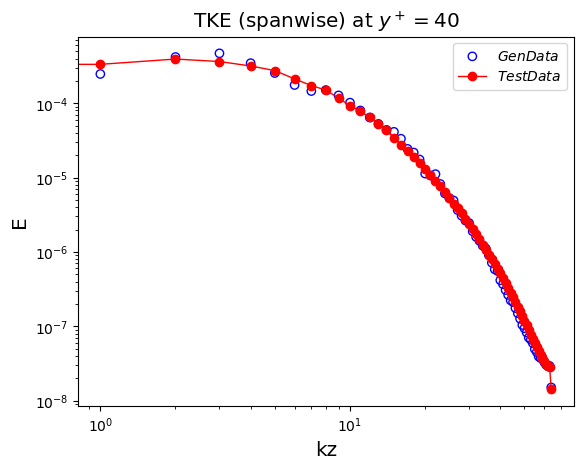

In [79]:
plt.figure()
plt.scatter(2*jnp.pi*tke_ground[0], tke_ground[1].mean(axis=(0,1)),label=rf'$Gen Data$', edgecolors="blue", linewidth=1, marker='o', facecolors='none')
plt.plot(2*jnp.pi*tke_ground_downsample[0], tke_ground_downsample[1].mean(axis=(0,1)),label=rf'$Test Data$', color="red", linewidth=1, marker='o')
plt.xscale('log')
plt.yscale('log')
plt.title(rf'TKE (spanwise) at $y^+={40}$', fontsize='x-large')
plt.xlabel('kz',fontsize='x-large')
plt.ylabel('E',fontsize='x-large')
plt.legend()
plt.show()

In [80]:
dz = 2*jnp.pi/128
dx = 4*jnp.pi/128
tke_ground =  jax.scipy.signal.welch(data[:, comp],fs=1/dx,scaling='spectrum',axis=1, nperseg=64)   #jax.scipy.signal.welch(data[:, comp, 64:],fs=1/dx,scaling='spectrum',axis=1, nperseg=64)
tke_ground_downsample = jax.scipy.signal.welch(data_downsampled[:, comp],fs=1/dx,scaling='spectrum',axis=1, nperseg=64)  # jax.scipy.signal.welch(data_downsampled[:, comp, 64:],fs=1/dx,scaling='spectrum',axis=1, nperseg=64)

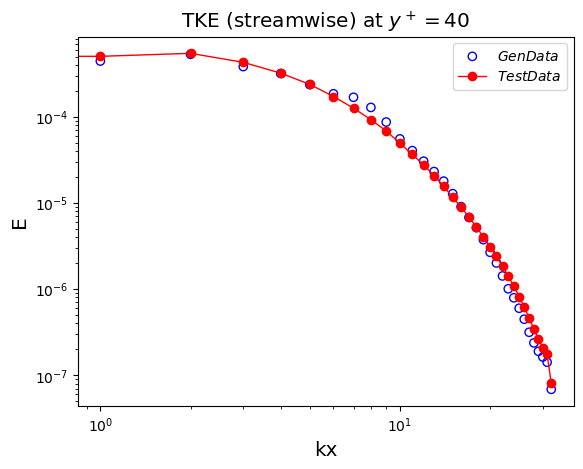

In [81]:
plt.figure()
plt.scatter(2*jnp.pi*tke_ground[0], tke_ground[1].mean(axis=(0,-1)),label=rf'$Gen Data$', edgecolors="blue", linewidth=1, marker='o', facecolors='none')
plt.plot(2*jnp.pi*tke_ground_downsample[0], tke_ground_downsample[1].mean(axis=(0,-1)),label=rf'$Test Data$', color="red", linewidth=1, marker='o')
plt.xscale('log')
plt.yscale('log')
plt.title(rf'TKE (streamwise) at $y^+={40}$', fontsize='x-large')
plt.xlabel('kx',fontsize='x-large')
plt.ylabel('E',fontsize='x-large')
plt.legend()
plt.show()

In [82]:
import numpy as np
u_ref = [np.loadtxt(f'/home/xiantao/storage/data/APGdata-180/APGchannel-0-long/postprocess/{x}_fluct_180.txt')[45,1] for x in ["u", "v", "w"]]

In [18]:
data.std(axis=(0,2,3))/0.045, jnp.array(u_ref)

(Array([1.8618914, 0.7400361, 1.0256559], dtype=float32),
 Array([1.8944341, 0.7988051, 1.0461913], dtype=float32))

In [19]:
# dz = 2*jnp.pi/128
# dx = 4*jnp.pi/128
# all_err_list = []
# for j in range(3):
#     tke_ground_downsample = jax.scipy.signal.welch(data_downsampled[:4000:10, j],fs=1/dx, scaling='spectrum',axis=1, nperseg=128)[1].mean(axis=(0,-1))
#     err_list = []
#     for i in range(10):
#         tke_ground = jax.scipy.signal.welch(data[i, :, j],fs=1/dx, scaling='spectrum',axis=1, nperseg=128)[1].mean(axis=(0,-1))
#         err_list.append(jnp.abs(jnp.abs(jnp.log(tke_ground/tke_ground_downsample))/jnp.log(tke_ground_downsample)).mean())
#     all_err_list.append(err_list)

In [20]:
# for i in range(3):
#     plt.plot([10, 20, 30, 40, 50, 60, 70, 80, 90, 99], jnp.array(all_err_list[i])*100, label=['u', 'v', 'w'][i])
# plt.ylabel('Log energy spectrum relative error')
# plt.xlabel('epoch trained (0 indexed)')
# plt.legend()
# plt.show()